In [1]:
import numpy as np
import pandas as pd

In [2]:
from subprocess import check_output

In [3]:
print(check_output(["ls", "./"]).decode("utf8"))

FashionMNIST.ipynb
fashion-mnist_test.csv.zip
fashion-mnist_train.csv.zip
t10k-images-idx3-ubyte.zip
t10k-labels-idx1-ubyte
train-images-idx3-ubyte.zip
train-labels-idx1-ubyte



In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from tf.keras.utils import to_categorical

In [13]:
print(check_output(["ls", "./"]).decode("utf8"))

FashionMNIST.ipynb
fashion-mnist_test.csv
fashion-mnist_test.csv.zip
fashion-mnist_train.csv
fashion-mnist_train.csv.zip
t10k-images-idx3-ubyte.zip
t10k-labels-idx1-ubyte
train-images-idx3-ubyte.zip
train-labels-idx1-ubyte



In [14]:
data_train = pd.read_csv('./fashion-mnist_train.csv')
data_test = pd.read_csv('./fashion-mnist_test.csv')

In [16]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [20]:
# data_train.iloc[:, 1:]

In [22]:
X = np.array(data_train.iloc[:, 1:])
y = tf.keras.utils.to_categorical(np.array(data_train.iloc[:, 0]))

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [24]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(data_test.iloc[:, 0]))

In [25]:
X_train.shape[0]

48000

In [26]:
len(X_train)

48000

In [27]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [29]:
X_train /= 255
X_test /= 255
X_val /= 255

In [39]:
#import tensorflow.keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization

In [40]:
batch_size = 256
num_classes = 10
epochs = 50

In [41]:
#input image dimensions
img_rows, img_cols = 28, 28

In [42]:
model = tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

Let's fit()! Note that fit() will return a History object which we can use to plot training vs. validation accuracy and loss.

In [45]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 30s 621us/step - loss: 0.8417 - acc: 0.6872 - val_loss: 0.4939 - val_acc: 0.8163
Epoch 2/50
48000/48000 [==============================] - 30s 632us/step - loss: 0.5187 - acc: 0.8060 - val_loss: 0.4129 - val_acc: 0.8461
Epoch 3/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.4446 - acc: 0.8358 - val_loss: 0.3737 - val_acc: 0.8643
Epoch 4/50
48000/48000 [==============================] - 30s 634us/step - loss: 0.3986 - acc: 0.8554 - val_loss: 0.3346 - val_acc: 0.8770
Epoch 5/50
48000/48000 [==============================] - 30s 622us/step - loss: 0.3706 - acc: 0.8634 - val_loss: 0.3213 - val_acc: 0.8804
Epoch 6/50
48000/48000 [==============================] - 30s 625us/step - loss: 0.3469 - acc: 0.8741 - val_loss: 0.2953 - val_acc: 0.8915
Epoch 7/50
48000/48000 [==============================] - 30s 625us/step - loss: 0.3302 - acc: 0.8799 - val_loss: 0.

In [46]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.205412789831
Test accuracy: 0.9251


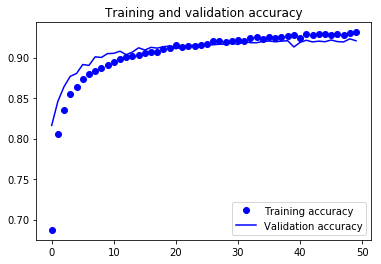

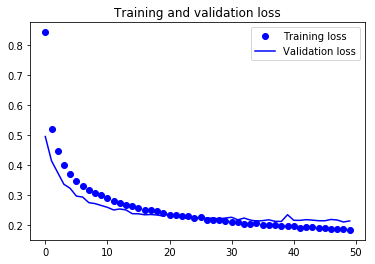

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [49]:
num_classes

10

In [50]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.84      0.91      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.90      0.89      0.90      1000
    Class 3       0.93      0.94      0.93      1000
    Class 4       0.88      0.89      0.89      1000
    Class 5       0.99      0.98      0.98      1000
    Class 6       0.80      0.74      0.77      1000
    Class 7       0.95      0.97      0.96      1000
    Class 8       0.99      0.97      0.98      1000
    Class 9       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.92     10000



More insight after visualizing the correct and incorrect predictions

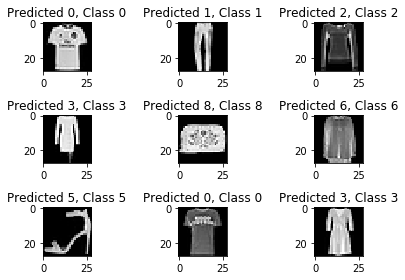

In [51]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

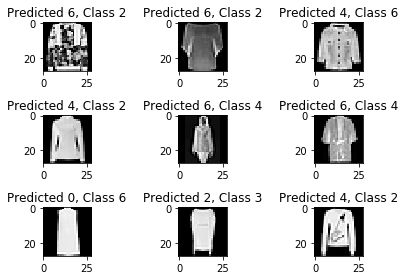

In [52]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

#### What do the activations look like?
The snippets are taken from Chollet, F (2017). The idea is the give an input data and visualize the activations of the conv layers.

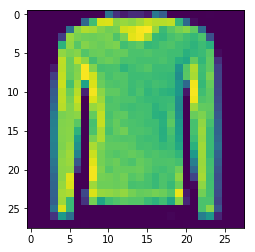

In [55]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

In [60]:
layer_outputs = [layer.output for layer in model.layers[:8]]

In [79]:
from tensorflow import keras as keras

In [87]:
from keras import models

Using TensorFlow backend.


In [95]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

AttributeError: 'Node' object has no attribute 'output_masks'

In [96]:
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

TypeError: 'NoneType' object is not iterable

In [97]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: name 'activations' is not defined